In [47]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from sklearn.model_selection import train_test_split
import pandas as pd
import sklearn
import xgboost
import shap

In [49]:
dataset = pd.read_csv('/content/drive/MyDrive/big_5/df_texts_ocean.csv')
features = pd.read_csv('/content/drive/MyDrive/big_5/big_5_features.csv')

In [50]:
dataset.head(2)

,user_id,post_text,Экстраверсия,Доброжелательность,Сознательность,Нейротизм,Открытость опыту,Экстраверсия_3,Доброжелательность_3,Сознательность_3,Нейротизм_3,Открытость опыту_3,Экстраверсия_5,Доброжелательность_5,Сознательность_5,Нейротизм_5,Открытость опыту_5,post_text_preprocessed
0,133,Открытое образование - Главная страница,4.88,4.11,4.67,1.13,4.9,2,2,2,0,2,4,3,4,0,4,открытое образование PUNK главная страница
1,133,Первый день форума «Бережливое управление 2.0»,4.88,4.11,4.67,1.13,4.9,2,2,2,0,2,4,3,4,0,4,первый день форума PUNK бережливое управление ...


In [51]:
features.head(2)

,adjs,advs,punkts,prons_1,prons_2,prons_3,nums,urls,conjunct,discourse,...,tense_past,tense_pres,mood_indc,mood_impr,aspect_perf,aspect_impf,emoji,hashtags,length,max_depth
0,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,2
1,2,0,3,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,6,3


In [52]:
def get_train_test(dataset, features, PREDICT_COLUMN):
  df = features.copy()

  df[PREDICT_COLUMN] = dataset[PREDICT_COLUMN]
  df['stratify'] = dataset[f'{PREDICT_COLUMN}_5']
  df['post_text_preprocessed'] = dataset['post_text_preprocessed']

  df = df.query('length > 10')
  #df = df.drop_duplicates(subset = "post_text_preprocessed") # это казалось хорошей идеей но скор сильно падает

  X_train, X_test, y_train, y_test = train_test_split(df, df[PREDICT_COLUMN], test_size=0.3, random_state=42, stratify=df['stratify'])

  X_train = X_train.drop(columns=[PREDICT_COLUMN, 'stratify', 'post_text_preprocessed'])
  X_test = X_test.drop(columns=[PREDICT_COLUMN, 'stratify', 'post_text_preprocessed'])

  return X_train, X_test, y_train, y_test

In [53]:
PREDICT_COLUMN = 'Доброжелательность'
X_train, X_test, y_train, y_test = get_train_test(dataset, features, PREDICT_COLUMN)
X_train.shape, X_test.shape

((50302, 21), (21558, 21))

In [54]:
model = xgboost.XGBRegressor(reg_lambda=15,reg_alpha=25)
model.fit(X_train, y_train)

model.score(X_test,y_test)

0.07246345575420032

In [55]:
X = pd.concat([X_train,X_test])
predictions = model.predict(X)

In [56]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


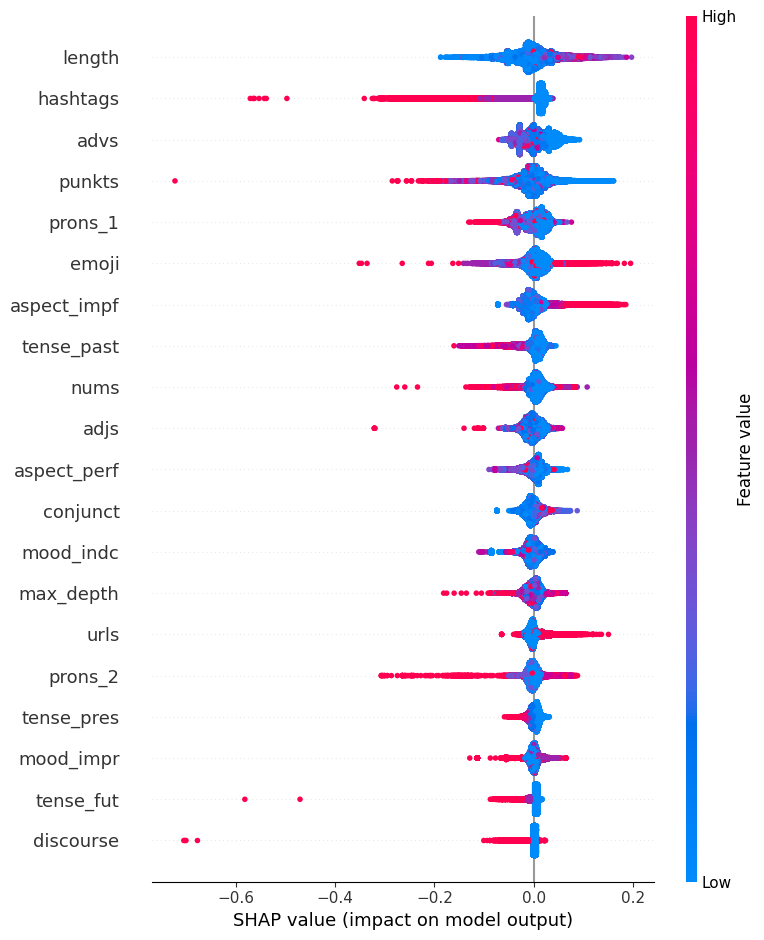

In [57]:
shap.summary_plot(shap_values, X)

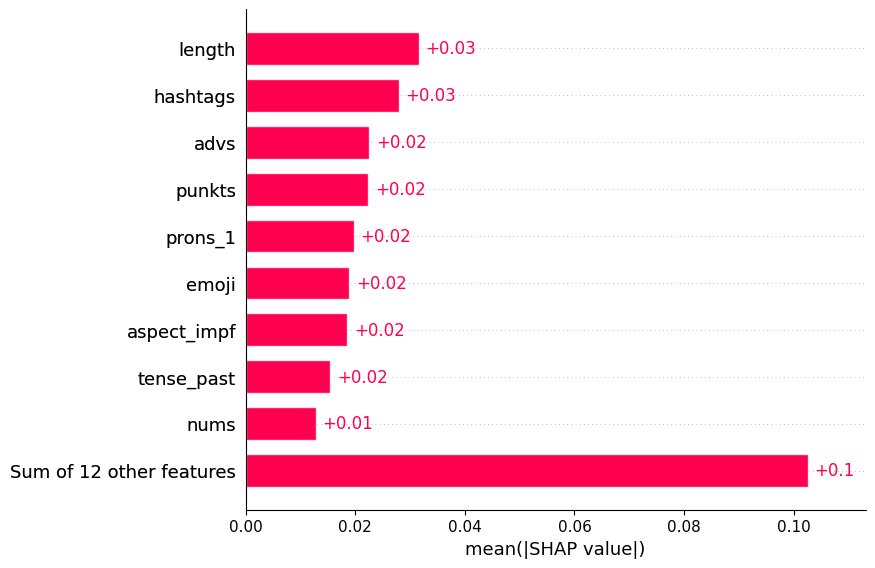

In [58]:
# By default a SHAP bar plot will take the mean absolute value of each feature over all the instances (rows) of the dataset.
shap.plots.bar(shap_values)

In [59]:
#for i,p in enumerate(predictions):
#  if p > 3.5 or p < 2.7:
#    print(i,p)

Выходные данные были обрезаны до нескольких последних строк (5000).
57716 3.566449
57719 3.6167414
57720 3.516383
57724 3.604068
57726 3.5840971
57728 3.7238195
57730 3.6879692
57736 3.563762
57737 3.5196173
57738 3.5242562
57741 3.6418412
57749 3.5806694
57752 3.5720882
57753 3.5430646
57754 3.6631377
57759 3.5609987
57761 3.5887516
57763 2.6737807
57768 3.517799
57769 3.6005898
57774 3.5075517
57778 3.5284321
57779 3.6227002
57782 3.5007944
57786 3.5270264
57788 3.5034924
57789 3.8051813
57793 3.716924
57795 3.7368357
57799 3.568034
57805 3.6043613
57809 3.5050213
57811 3.5560212
57812 3.5040922
57813 3.5787556
57814 3.503436
57816 3.5342262
57820 3.5881727
57821 3.6305654
57824 3.5079603
57826 3.7598903
57827 3.540127
57828 3.6365795
57837 3.5207505
57839 3.526336
57841 3.5101798
57849 3.559945
57850 3.6337545
57859 3.61879
57860 3.6191316
57865 3.5589626
57866 3.5099702
57874 3.513584
57875 3.70427
57880 3.5547562
57888 3.5805452
57892 3.5187852
57899 3.627877
57900 3.5341501
57907

In [60]:
predictions[49393]
# Низкое значение доброжелательности

2.6737807

In [61]:
dataset.iloc[49393]

user_id                                                                 449
post_text                                  Я не я совсем, когда голодна 😂😂😂
Экстраверсия                                                           3.25
Доброжелательность                                                     3.56
Сознательность                                                          3.0
Нейротизм                                                               3.5
Открытость опыту                                                        3.4
Экстраверсия_3                                                            1
Доброжелательность_3                                                      1
Сознательность_3                                                          0
Нейротизм_3                                                               2
Открытость опыту_3                                                        0
Экстраверсия_5                                                            2
Доброжелател

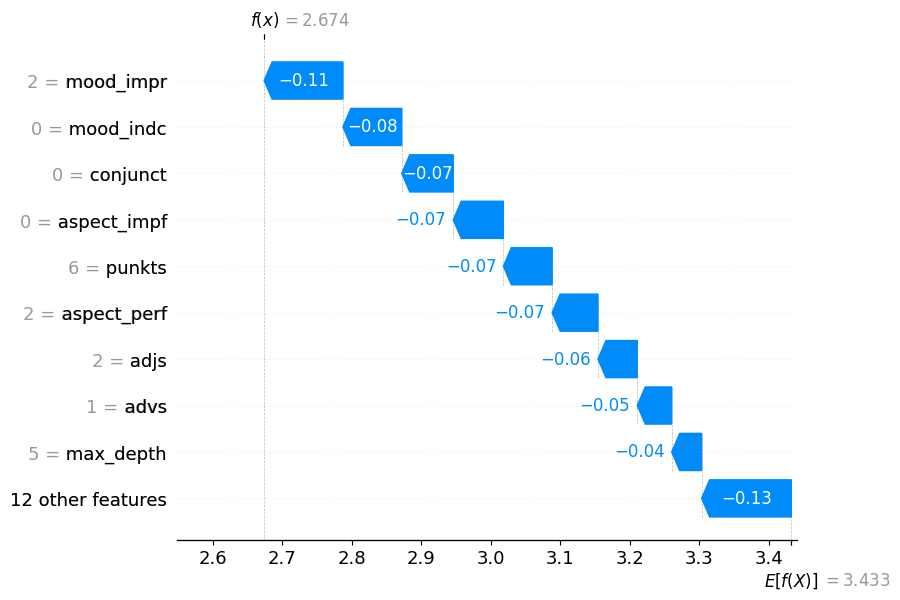

In [62]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[49393])

In [63]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[49393])

In [64]:
predictions[71857]
# Высокое значение доброжелательности

3.5219734

In [65]:
dataset.iloc[71857]

user_id                                          816
post_text                          всем на заметку!!
Экстраверсия                                    4.63
Доброжелательность                              3.33
Сознательность                                  3.78
Нейротизм                                       3.38
Открытость опыту                                 4.7
Экстраверсия_3                                     2
Доброжелательность_3                               1
Сознательность_3                                   2
Нейротизм_3                                        1
Открытость опыту_3                                 2
Экстраверсия_5                                     4
Доброжелательность_5                               2
Сознательность_5                                   3
Нейротизм_5                                        2
Открытость опыту_5                                 4
post_text_preprocessed    всем на заметку PUNK PUNK 
Name: 71857, dtype: object

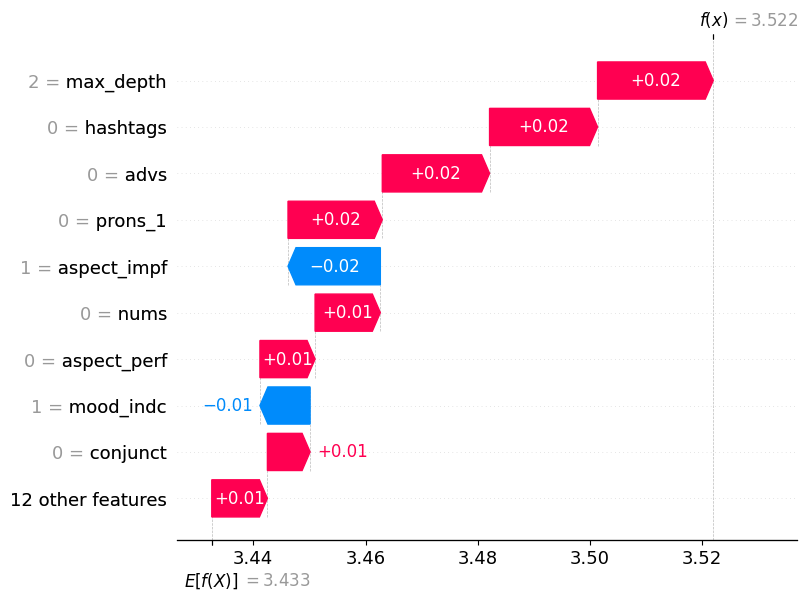

In [66]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[71857])

In [67]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[71857])

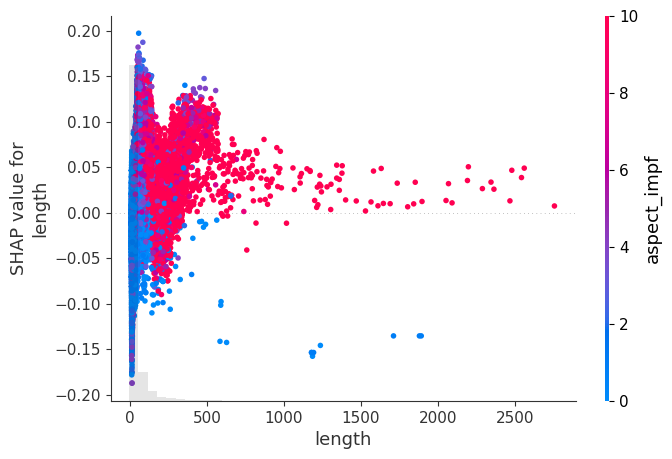

In [68]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"length"], color=shap_values)

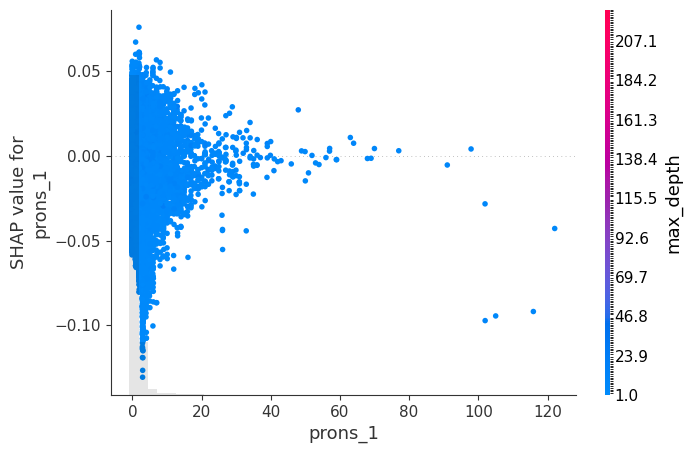

In [69]:
shap.plots.scatter(shap_values[:,"prons_1"], color=shap_values)

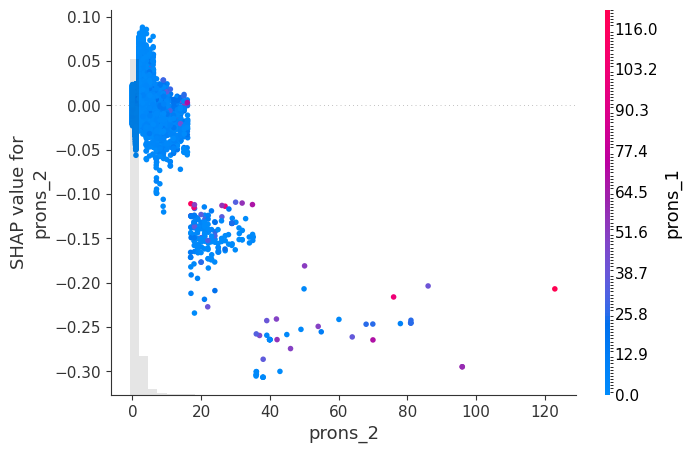

In [70]:
shap.plots.scatter(shap_values[:,"prons_2"], color=shap_values)

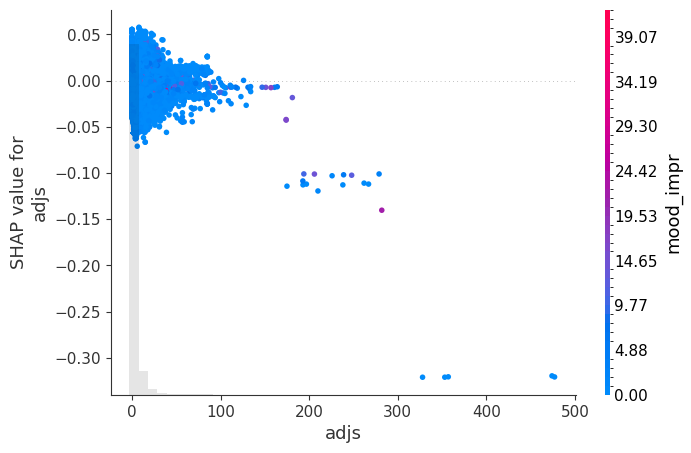

In [71]:
shap.plots.scatter(shap_values[:,"adjs"], color=shap_values)

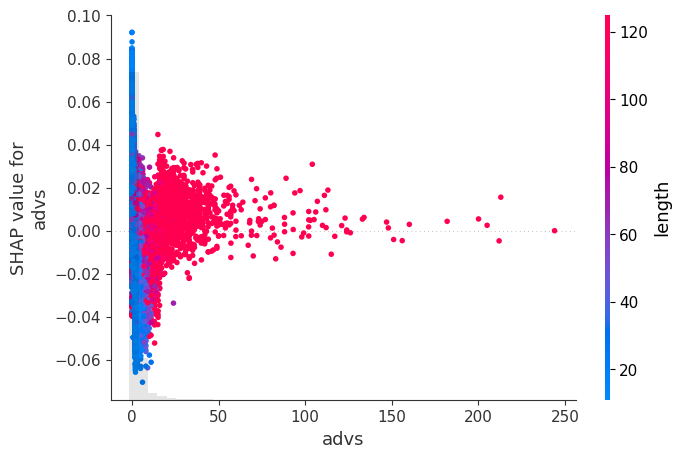

In [72]:
shap.plots.scatter(shap_values[:,"advs"], color=shap_values)

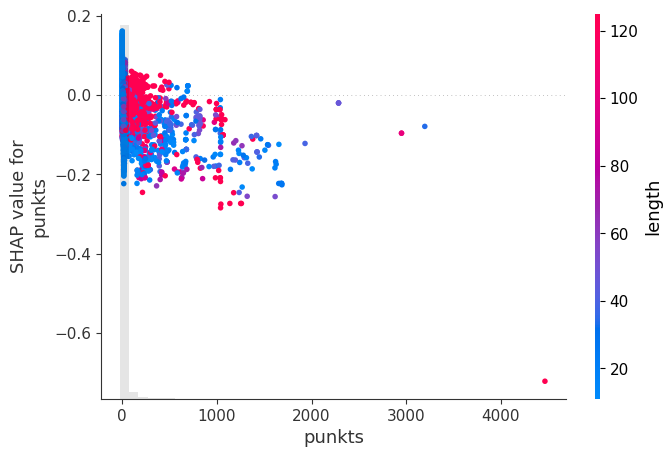

In [73]:
shap.plots.scatter(shap_values[:,"punkts"], color=shap_values)

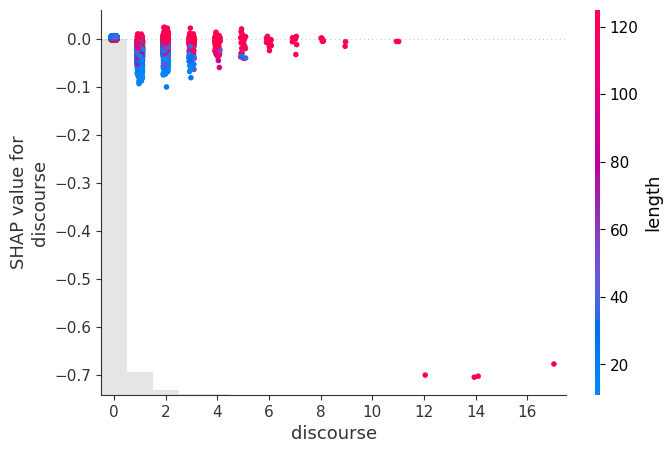

In [74]:
shap.plots.scatter(shap_values[:,"discourse"], color=shap_values)

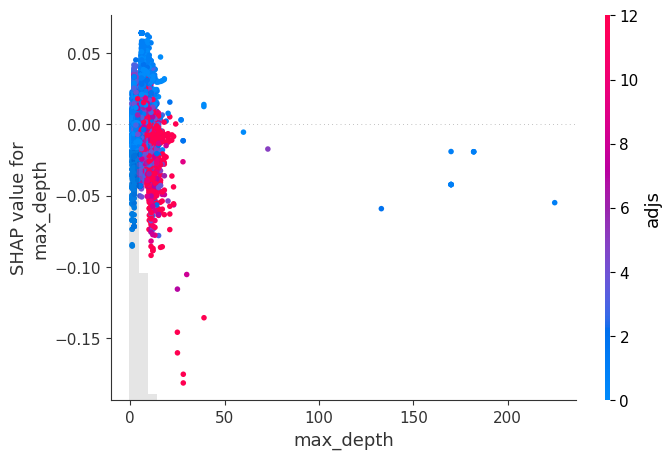

In [75]:
shap.plots.scatter(shap_values[:,"max_depth"], color=shap_values)

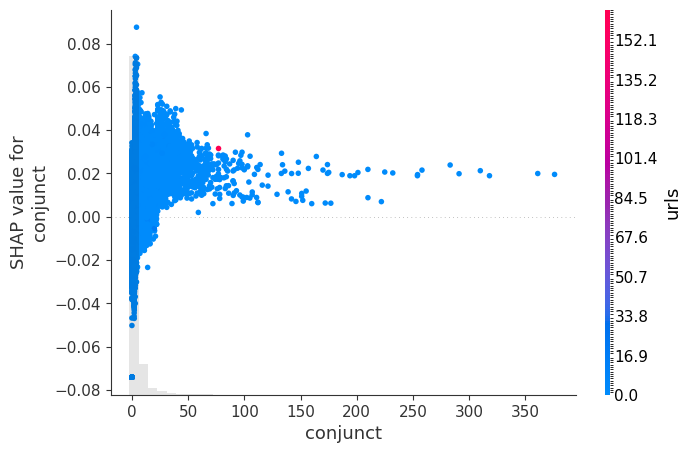

In [76]:
shap.plots.scatter(shap_values[:,"conjunct"], color=shap_values)

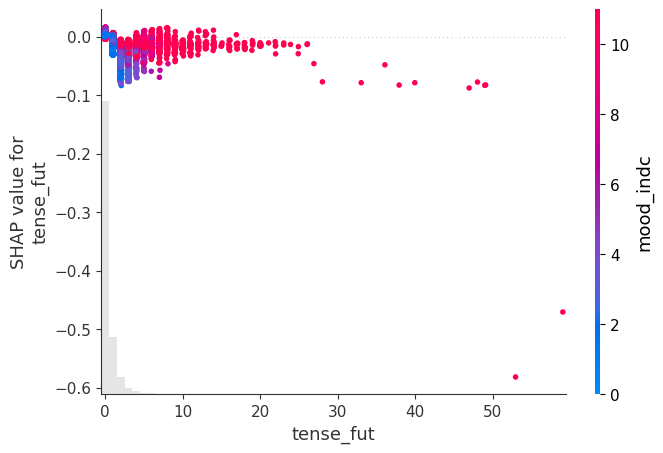

In [77]:
shap.plots.scatter(shap_values[:,"tense_fut"], color=shap_values)

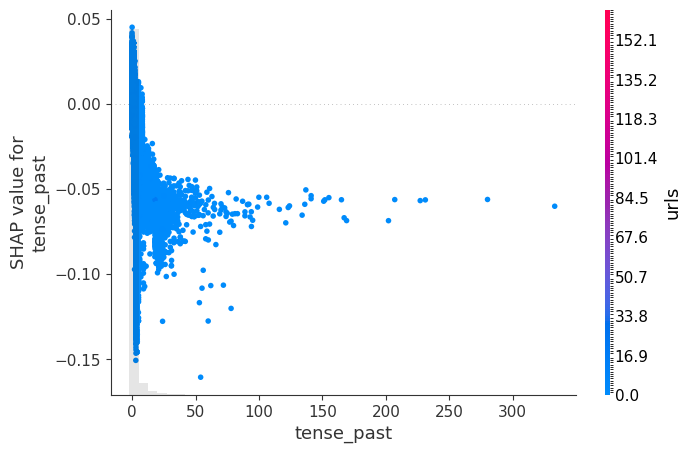

In [78]:
shap.plots.scatter(shap_values[:,"tense_past"], color=shap_values)

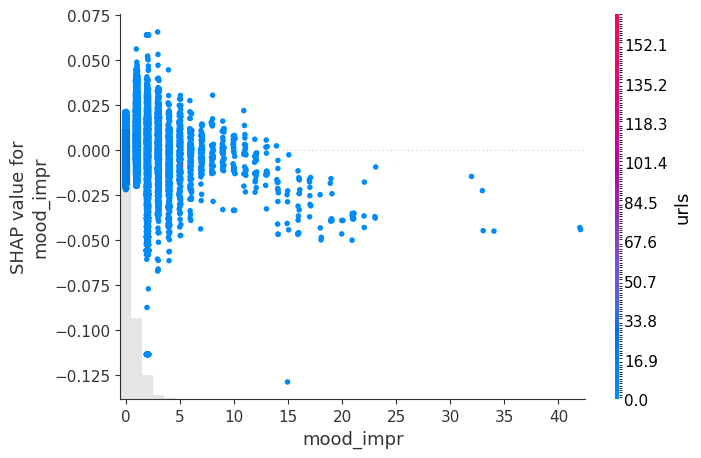

In [79]:
shap.plots.scatter(shap_values[:,"mood_impr"], color=shap_values)

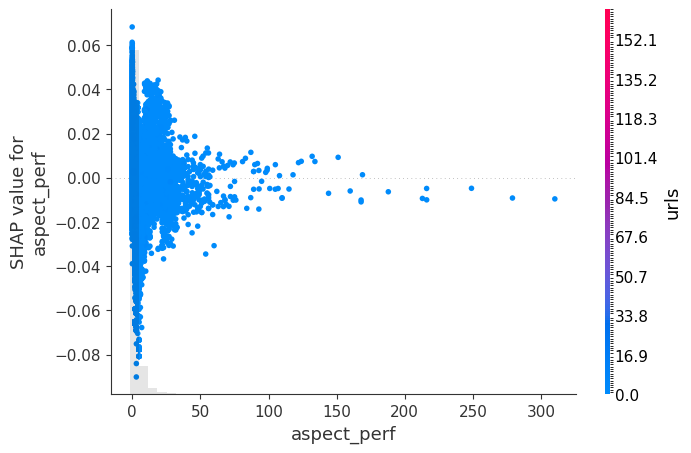

In [80]:
shap.plots.scatter(shap_values[:,"aspect_perf"], color=shap_values)

In [81]:
shap.initjs()
shap_values = explainer(X.head(100))
shap.plots.force(shap_values)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


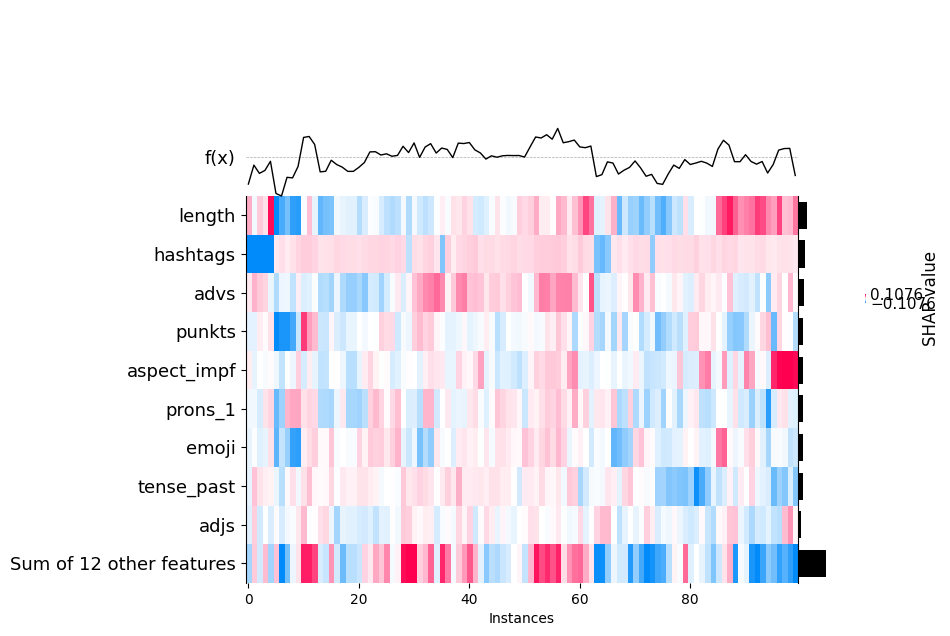

In [82]:
shap.plots.heatmap(shap_values)